# Descente de Gradient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
%matplotlib inline

La **descente de Gradient** est un algorithme permettant de trouver le minimum d’une fonction en se déplaçant itérativement dans la direction de la descente la plus élevée (solution numérique). Pour cela on cherche à chaque itération la dérivée en un point. Ce gradient nous donne deux informations :  

- **la direction** : le sens de la descente (si elle est négative, c'est que la direction est face à un minimum).
- **la magnitude** : l'intensité de la descente (plus cette valeur est élevée, plus il s'agit d'une pente élevée).


Il y a 3 étapes :

- On prend un point au hasard $x_0$
- On calcule la valeur de la pente par la dérivée $f′(x_0)$
- On avance dans la direction opposée à la pente : $x_1 =x_0 − \alpha f′(x_0)$

$\alpha$ correspond au taux d’apprentissage, et le signe moins permet d’aller dans la direction opposée.

**Exemple** : 

$$f(x) = 2x^2 \; cos(x) - 5x$$

In [177]:
def f(x):
    return 2 * x * x * np.cos(x) - 5 * x

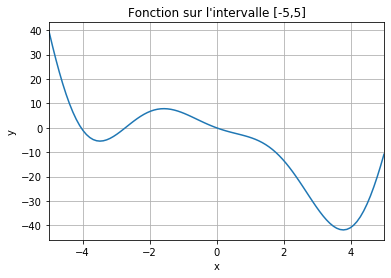

In [3]:
x = np.linspace(-5,5, 100)

plt.grid(True)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-5,5])
plt.title("Fonction sur l'intervalle [-5,5]");

### Première étape : choisir un point

In [178]:
x0 = -1
print(f"La valeur de f(0) est égale à {round(f(x0),2)}")

La valeur de f(0) est égale à 6.08


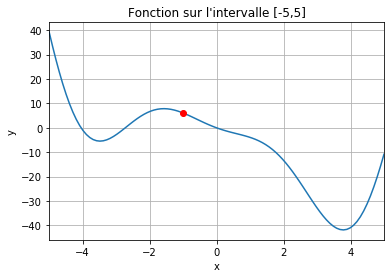

In [5]:
plt.grid(True)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-5,5])
plt.title("Fonction sur l'intervalle [-5,5]")
plt.plot(x0, f(x0), c='r', marker='o');

### Deuxième étape : calculer la valeur de la pente

On calcule la dérivée de la fonction : 

$$f(x) = 2x^2 \; cos(x) - 5x$$

*Opération* : $f \cdot{} g$  

*Dérivée* : $f' \cdot{} g + f \cdot{} g'$

-  $f = 2x^2$ 
-  $g = cos(x)$ 
-  $g' = -sin(x)$ 
-  $f' = 4x$

$$ f'(x) = 4x \; cos(x) - 2x^2 sin(x) - 5 $$

In [6]:
def df(x):
    return 4 * x * np.cos(x) - 2 * x * x * np.sin(x) - 5

In [7]:
print(f" La valeur de la dérivée de f(-1) est : {round(df(x0),2)}")

 La valeur de la dérivée de f(-1) est : -5.48


### Troisième étape : on avance dans la direction opposée à la pente 

La descente de gradient se fait par la formule suivante : 

$$ x_1= x_0 − \alpha ∗ f'(x_0)$$

In [8]:
alpha = 0.05

In [9]:
x1 = x0 - alpha * df(x0)

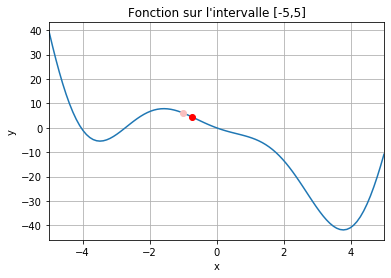

In [28]:
plt.grid(True)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-5,5])
plt.title("Fonction sur l'intervalle [-5,5]")
plt.plot(x0, f(x0), c="#FABFBF", marker='o', zorder=10);
plt.plot(x1, f(x1), c='r', marker='o');

On recommence jusqu'à que le résultat soit stable : 

In [11]:
list1 = [-1]
for i in range(30):
    list1.append(list1[i] - alpha * df(list1[i]))

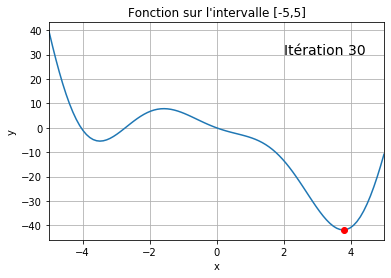

In [15]:
for j,i in enumerate(list1) :
    plt.grid(True)
    plt.plot(x, f(x))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Fonction sur l'intervalle [-5,5]")
    plt.plot(i ,f(i), c='r', marker='o')
    plt.text(2,30, s=f'Itération {j}',fontsize=14)
    plt.xlim([-5,5])
    #plt.savefig(f"iteration_{j}")
    plt.show();
    sleep(1)
    clear_output(True)

<img src="src/gradient.gif">

### Ce qu'il faut savoir

> **Comment fixer le taux d’apprentissage ?**

Le taux d'apprentissage est la taille de ces étapes. Il faut trouver le juste milieu en prenant en compte que :

- Plus la valeur $\alpha$ est grande, plus on va avancer vite, mais l’algorithme risque de ne jamais converger.
- Plus la valeur $\alpha$ est petite, plus on va avancer lentement, et donc plus l'algorithme va mettre du temps à converger.


*Note : Le taux d'apprentissage idéal dans une dimension est $\frac{1}{f''(x)}$ (dérivée seconde de $f(x)$ pour $x$). Pour plus de deux dimension, il s'agit de l'inverse de la hessienne (matrice de dérivée partielle seconde).*

### Cas pour plusieurs paramètres

On choisit une fonction selon $x$ et $y$ :

$$f(x,y) = (x-1)(x-2) + (y+3)(y+4)$$

In [2]:
def fonction(x,y):
    return (x-1)*(x-2) + (y+3)*(y+4)

Les dérivées partielles respectives sont les suivantes : 

$$\frac{\partial f(x,y)}{\partial x} = 2x - 3 $$
$$\frac{\partial f(x,y)}{\partial y} = 2y + 7 $$

In [3]:
def d_x(x):
    return 2*x-3
def d_y(y):
    return 2*y+7

La descente de gradient se fait maintenant sur deux paramètres :

$$ x_1= x_0 − \alpha ∗ f'(x_0)$$
$$ y_1= y_0 − \alpha ∗ f'(y_0)$$

In [4]:
def gradient_descent(param_x, param_y, learning_rate, n_iterations):
    """
    Descente de gradient pour trouver le minimum d'une fonction.
    """
    
    f_history = []
    param = []
    
    for i in range(0, n_iterations):
        
        param_x = param_x - learning_rate * d_x(param_x)
        param_y = param_y - learning_rate * d_y(param_y)
        
        param.append([param_x, param_y])
        f_history.append([fonction(param_x, param_y)])
        
    return param_x, param_y, f_history, np.array(param)

In [5]:
x, y, f_hist, param = gradient_descent(-4,-5,0.02, 120)

In [6]:
print(f'Valeur de x : {x}\nValeur de y : {y}')

Valeur de x : 1.4589880278068605
Valeur de y : -3.511185083325402


Création de l'axe $Z$ pour l'affichage graphique

In [7]:
from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(-5,5, 30)
Y = np.linspace(-5,5, 30)
X,Y = np.meshgrid(X,Y)

Z = fonction(X,Y)

Convergence de l'algorithme : 

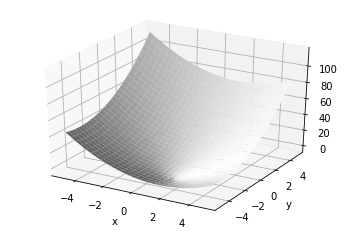

In [9]:
for j,i in enumerate(param) :
    
    ax = plt.axes(projection="3d")
    ax.plot_surface(X,Y,Z, color='white', zorder=-1)
    ax.scatter(i[0],i[1],fonction(i[0], i[1]), 
               c='r', zorder=1, s=100, marker='.')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    #ax.view_init(40,35)
    ax.text
    #plt.savefig(f"gif/iteration_{j}")
    plt.show()
    sleep(1)
    clear_output(True);

<img src="src/new_map.gif">

On peut observer la convergence de l'algorithme vers sa valeur minimale en regardant la courbe de la fonction :

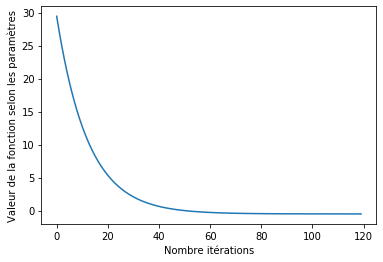

In [179]:
plt.plot(range(len(f_hist)), f_hist)
plt.xlabel("Nombre itérations")
plt.ylabel("Valeur de la fonction selon les paramètres");